# 프로젝트명 : 각 지역의 인구 분포도 분석하기(2022.01)

##### 자료출처
- https://www.mois.go.kr/frt/a01/frtMain.do (행정안정부->주민등록인구통계)
- 202201 인구현황

##### 분석 목적
- 서울에는 젊은 인구층의 분포가 높을까?
- 가장 많은 연령대는 어느 구간일까?

##### 분석 라이브러리
- 판다스, 넘파이, 맷플롯립, 시본 pandas / seaborn / numpy / matplotlib

##### 컬럼
- 행정구역, 총인구수 / (남)0-9세 부터 (남)100이상 / (여)0-9세 부터 (여)100이상

##### 행정구역
- '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도’

## 라이브러리 불러오기 및 데이터 확인

In [45]:
# 필요한 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

In [ ]:
import matplotlib.font_manager as fm

# 노트북에 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

In [47]:
# 폰트설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [124]:
# 데이터 불러오기
df = pd.read_csv("data/202201_202206_연령별인구현황_월간.csv", encoding = 'cp949')

In [125]:
# 데이터 확인
df.head()

,행정구역,2022년01월_거주자_총인구수,2022년01월_거주자_0~9세,2022년01월_거주자_10~19세,2022년01월_거주자_20~29세,2022년01월_거주자_30~39세,2022년01월_거주자_40~49세,2022년01월_거주자_50~59세,2022년01월_거주자_60~69세,2022년01월_거주자_70~79세,...,2022년06월_여_거주자_10~19세,2022년06월_여_거주자_20~29세,2022년06월_여_거주자_30~39세,2022년06월_여_거주자_40~49세,2022년06월_여_거주자_50~59세,2022년06월_여_거주자_60~69세,2022년06월_여_거주자_70~79세,2022년06월_여_거주자_80~89세,2022년06월_여_거주자_90~99세,2022년06월_여_거주자_100세 이상
0,전국 (0000000000),"51,311,951","3,734,657","4,697,725","6,610,316","6,666,658","8,101,102","8,551,128","7,134,103","3,702,467",...,"2,269,562","3,104,493","3,193,889","3,977,236","4,239,024","3,670,338","2,055,878","1,215,166","208,282","6,119"
1,서울특별시 (1100000000),"9,398,649","579,102","752,225","1,410,041","1,425,783","1,459,967","1,479,988","1,267,387","688,460",...,"366,185","731,556","710,266","733,334","752,315","669,620","382,725","184,023","30,393",926
2,부산광역시 (2600000000),"3,328,708","218,408","265,621","412,440","402,009","498,014","548,508","545,947","297,599",...,"128,630","195,442","194,217","245,704","279,312","289,186","166,170","81,109","12,302",305
3,대구광역시 (2700000000),"2,372,283","166,818","217,987","306,851","282,591","369,467","415,876","341,076","177,988",...,"104,620","141,614","132,760","185,395","212,065","179,922","101,806","54,955","8,095",217
4,인천광역시 (2800000000),"2,928,763","215,957","270,463","388,128","398,385","477,249","505,283","397,917","178,865",...,"131,392","183,584","192,100","233,258","253,869","204,577","99,236","55,491","10,275",313


In [126]:
# 컬럼 확인
df.columns

Index(['행정구역', '2022년01월_거주자_총인구수', '2022년01월_거주자_0~9세', '2022년01월_거주자_10~19세',
       '2022년01월_거주자_20~29세', '2022년01월_거주자_30~39세', '2022년01월_거주자_40~49세',
       '2022년01월_거주자_50~59세', '2022년01월_거주자_60~69세', '2022년01월_거주자_70~79세',
       ...
       '2022년06월_여_거주자_10~19세', '2022년06월_여_거주자_20~29세',
       '2022년06월_여_거주자_30~39세', '2022년06월_여_거주자_40~49세',
       '2022년06월_여_거주자_50~59세', '2022년06월_여_거주자_60~69세',
       '2022년06월_여_거주자_70~79세', '2022년06월_여_거주자_80~89세',
       '2022년06월_여_거주자_90~99세', '2022년06월_여_거주자_100세 이상'],
      dtype='object', length=234)

## 전처리 과정

- 컬럼명이 길고 복잡하기 때문에 가독성있는 컬럼명으로 변경해주었습니다.
- 남,여 성별이 컬럼에 포함되어 나타나있기 때문에 간편화하기 위해 성별 컬럼을 따로 만들어주었습니다.
- 나이대별로 그래프를 그리기위해 컬럼에 있는 나이대를 행으로 이동시켜주었습니다.
- 총인구수는 행정구역별로 같은 내용이 계속 반복되어 나타나기 때문에 테이블을 따로 분리시켜주었습니다.
- 총인구수와 연령별_인구수의 자료형이 object형이기 때문에 계산할 수 있도록 int형으로 변환해주었습니다.

#### 전처리 결과 (총 테이블 2개로 정리하였습니다.)
- p_df_sum(행정구역, 총인구수 테이블)
- p_df_1(행정구역, 성별, 연령구간, 연령별_인구수 테이블)

In [127]:
# 중복된 컬럼 제거하기
df.drop(['2022년01월_남_거주자_연령구간인구수','2022년01월_여_거주자_연령구간인구수'],axis=1,inplace=True)

In [128]:
# 행정구역 뒤에 번호 없애기
def parse_region(data):
    parse = data.split(" ")[0] # 뒤에 있는 문자 가져오기
    parse = parse.replace(' ', '') # 공백 없애기
    return parse

In [129]:
df["행정구역"] = df["행정구역"].apply(parse_region) # 함수적용
df.head()

,행정구역,2022년01월_거주자_총인구수,2022년01월_거주자_0~9세,2022년01월_거주자_10~19세,2022년01월_거주자_20~29세,2022년01월_거주자_30~39세,2022년01월_거주자_40~49세,2022년01월_거주자_50~59세,2022년01월_거주자_60~69세,2022년01월_거주자_70~79세,...,2022년06월_여_거주자_10~19세,2022년06월_여_거주자_20~29세,2022년06월_여_거주자_30~39세,2022년06월_여_거주자_40~49세,2022년06월_여_거주자_50~59세,2022년06월_여_거주자_60~69세,2022년06월_여_거주자_70~79세,2022년06월_여_거주자_80~89세,2022년06월_여_거주자_90~99세,2022년06월_여_거주자_100세 이상
0,전국,"51,311,951","3,734,657","4,697,725","6,610,316","6,666,658","8,101,102","8,551,128","7,134,103","3,702,467",...,"2,269,562","3,104,493","3,193,889","3,977,236","4,239,024","3,670,338","2,055,878","1,215,166","208,282","6,119"
1,서울특별시,"9,398,649","579,102","752,225","1,410,041","1,425,783","1,459,967","1,479,988","1,267,387","688,460",...,"366,185","731,556","710,266","733,334","752,315","669,620","382,725","184,023","30,393",926
2,부산광역시,"3,328,708","218,408","265,621","412,440","402,009","498,014","548,508","545,947","297,599",...,"128,630","195,442","194,217","245,704","279,312","289,186","166,170","81,109","12,302",305
3,대구광역시,"2,372,283","166,818","217,987","306,851","282,591","369,467","415,876","341,076","177,988",...,"104,620","141,614","132,760","185,395","212,065","179,922","101,806","54,955","8,095",217
4,인천광역시,"2,928,763","215,957","270,463","388,128","398,385","477,249","505,283","397,917","178,865",...,"131,392","183,584","192,100","233,258","253,869","204,577","99,236","55,491","10,275",313


##### 남성테이블, 여성테이블 나누어 컬럼 정리하고 합병하기

In [130]:
# df_1 = 남성테이블
columns = ['행정구역','2022년01월_남_거주자_총인구수','2022년01월_남_거주자_0~9세',
           '2022년01월_남_거주자_10~19세','2022년01월_남_거주자_20~29세','2022년01월_남_거주자_30~39세','2022년01월_남_거주자_40~49세',
           '2022년01월_남_거주자_50~59세','2022년01월_남_거주자_60~69세','2022년01월_남_거주자_70~79세','2022년01월_남_거주자_80~89세',
           '2022년01월_남_거주자_90~99세','2022년01월_남_거주자_100세 이상']
df_1 = df[columns].copy() # columns 복사하기
df_1.columns = ['행정구역','총인구수','10대미만','10대','20대','30대','40대','50대','60대','70대',
                '80대','90대','100대 이상']

In [131]:
# df_2 = 여성 테이블
columns = ['행정구역','2022년01월_여_거주자_총인구수','2022년01월_여_거주자_0~9세',
           '2022년01월_여_거주자_10~19세','2022년01월_여_거주자_20~29세','2022년01월_여_거주자_30~39세','2022년01월_여_거주자_40~49세',
           '2022년01월_여_거주자_50~59세','2022년01월_여_거주자_60~69세','2022년01월_여_거주자_70~79세','2022년01월_여_거주자_80~89세',
           '2022년01월_여_거주자_90~99세','2022년01월_여_거주자_100세 이상']
df_2 = df[columns].copy() # columns 복사하기
df_2.columns = ['행정구역','총인구수','10대미만','10대','20대','30대','40대','50대','60대','70대',
                '80대','90대','100대 이상']

In [132]:
# 테이블 구분할 수 있게 '성별 = 남' 컬럼 넣어주기
df_1['성별'] = '남'
df_1.head()

,행정구역,총인구수,10대미만,10대,20대,30대,40대,50대,60대,70대,80대,90대,100대 이상,성별
0,전국,"25,572,304","1,914,414","2,424,985","3,467,745","3,443,618","4,113,193","4,318,084","3,493,624","1,679,773","657,582","58,172","1,114",남
1,서울특별시,"4,561,509","297,383","385,722","678,346","712,144","722,516","727,839","597,948","313,067","116,185","10,115",244,남
2,부산광역시,"1,627,712","112,086","136,828","213,676","206,226","251,079","266,973","257,523","134,574","45,430","3,264",53,남
3,대구광역시,"1,168,125","85,496","113,508","163,260","148,319","182,188","203,224","162,133","78,236","29,531","2,200",30,남
4,인천광역시,"1,465,317","110,855","138,962","202,283","206,366","244,189","251,805","196,791","82,176","29,111","2,712",67,남


In [133]:
# 테이블 구분할 수 있게 '성별 = 여' 컬럼 넣어주기
df_2['성별'] = '여'
df_2.head()

,행정구역,총인구수,10대미만,10대,20대,30대,40대,50대,60대,70대,80대,90대,100대 이상,성별
0,전국,"25,739,647","1,820,243","2,272,740","3,142,571","3,223,040","3,987,909","4,233,044","3,640,479","2,022,694","1,185,160","205,737","6,030",여
1,서울특별시,"4,837,140","281,719","366,503","731,695","713,639","737,451","752,149","669,439","375,393","177,946","30,264",942,여
2,부산광역시,"1,700,996","106,322","128,793","198,764","195,783","246,935","281,535","288,424","163,025","79,028","12,091",296,여
3,대구광역시,"1,204,158","81,322","104,479","143,591","134,272","187,279","212,652","178,943","99,752","53,704","7,962",202,여
4,인천광역시,"1,463,446","105,102","131,501","185,845","192,019","233,060","253,478","201,126","96,689","54,115","10,195",316,여


#### 10대미만 ~ 100대이상 컬럼을 행으로 이동하기 (연령구간별로 그래프를 그리기 위함)

In [134]:
df_1 = pd.melt(df_1, id_vars=['행정구역','총인구수','성별'], value_vars=['10대미만','10대','20대','30대','40대','50대','60대','70대','80대','90대','100대 이상'])
df_2 = pd.melt(df_2, id_vars=['행정구역','총인구수','성별'], value_vars=['10대미만','10대','20대','30대','40대','50대','60대','70대','80대','90대','100대 이상'])
df_1.head()
# id_vars는 그대로 있을 행, value_vars는 열로 이동할 행

,행정구역,총인구수,성별,variable,value
0,전국,"25,572,304",남,10대미만,"1,914,414"
1,서울특별시,"4,561,509",남,10대미만,"297,383"
2,부산광역시,"1,627,712",남,10대미만,"112,086"
3,대구광역시,"1,168,125",남,10대미만,"85,496"
4,인천광역시,"1,465,317",남,10대미만,"110,855"


In [135]:
# columns = ['행정구역','총인구수','성별','연령구간','연령별_인구수']
df_1.columns = ['행정구역','총인구수','성별','연령구간','연령별_인구수']
df_2.columns = ['행정구역','총인구수','성별','연령구간','연령별_인구수']

In [136]:
# 컬럼 합병하기
p_df_1 = pd.concat([df_1,df_2])

In [137]:
p_df_1.reset_index(drop=True,inplace=True)

In [138]:
# 잘 정리되었는지 확인하기
p_df_1.head()

,행정구역,총인구수,성별,연령구간,연령별_인구수
0,전국,"25,572,304",남,10대미만,"1,914,414"
1,서울특별시,"4,561,509",남,10대미만,"297,383"
2,부산광역시,"1,627,712",남,10대미만,"112,086"
3,대구광역시,"1,168,125",남,10대미만,"85,496"
4,인천광역시,"1,465,317",남,10대미만,"110,855"


In [139]:
# 잘 정리되었는지 확인하기
p_df_1.tail()

,행정구역,총인구수,성별,연령구간,연령별_인구수
391,전라북도,"893,821",여,100대 이상,346
392,전라남도,"907,495",여,100대 이상,406
393,경상북도,"1,297,246",여,100대 이상,489
394,경상남도,"1,638,568",여,100대 이상,342
395,제주특별자치도,"335,570",여,100대 이상,181


In [140]:
p_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   행정구역     396 non-null    object
 1   총인구수     396 non-null    object
 2   성별       396 non-null    object
 3   연령구간     396 non-null    object
 4   연령별_인구수  396 non-null    object
dtypes: object(5)
memory usage: 15.6+ KB


##### 모든 컬럼의 변수 타입이 object(문자열)이기 때문에 숫자 컬럼은 int(정수형)으로 변경

In [141]:
# 숫자에 , 없애고 int형 변환
p_df_1["총인구수"] = p_df_1["총인구수"].str.replace(',', '').astype(int)
p_df_1['연령별_인구수'] = p_df_1['연령별_인구수'].str.replace(',', '').astype(int)

In [142]:
p_df_1.head()

,행정구역,총인구수,성별,연령구간,연령별_인구수
0,전국,25572304,남,10대미만,1914414
1,서울특별시,4561509,남,10대미만,297383
2,부산광역시,1627712,남,10대미만,112086
3,대구광역시,1168125,남,10대미만,85496
4,인천광역시,1465317,남,10대미만,110855


In [143]:
# 태블로 시각화에 사용하기 위해 저장하기
p_df_1.to_csv('연령별인구_1월_연령별분리_최종.csv')

In [144]:
p_df_1['행정구역'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [145]:
# 총 행정구역 개수
p_df_1['행정구역'].nunique()

18

#### 행정구역별과 총인구수만 분리하기
- 총인구수는 행정구역별로 반복되어 나타나있기 때문에 따로 분리하였습니다. 

#### 행정구역별 가장 인구가 많은 순위 구하기
- 행정구역별 총인구수만 테이블 만들기
- 행정구역 = 18개

In [146]:
p_df_sum = p_df_1.drop(['성별','연령구간','연령별_인구수'],axis=1)

In [147]:
p_df_sum.head()

,행정구역,총인구수
0,전국,25572304
1,서울특별시,4561509
2,부산광역시,1627712
3,대구광역시,1168125
4,인천광역시,1465317


In [148]:
# 행정구역 중복된값 정리
p_df_sum = p_df_sum.loc[:17]
p_df_sum.head()

,행정구역,총인구수
0,전국,25572304
1,서울특별시,4561509
2,부산광역시,1627712
3,대구광역시,1168125
4,인천광역시,1465317


In [149]:
# 행정구역 순위 구하기
p_df_sum.sort_values(by=['총인구수'],ascending = False)

,행정구역,총인구수
0,전국,25572304
9,경기도,6785711
1,서울특별시,4561509
16,경상남도,1659877
2,부산광역시,1627712
4,인천광역시,1465317
15,경상북도,1317066
3,대구광역시,1168125
12,충청남도,1078534
14,전라남도,918945


##### 가장 인구수가 많은 top5
- 경기도, 서울특별시, 경상남도, 부산광역시, 인천광역시

#### 총인구수 제거하기
- 행정구역, 총인구수를 테이블로 따로 분리하였기 때문에 p_df_1 테이블에서는 제거해주었습니다.

In [150]:
p_df_1.drop('총인구수',axis=1,inplace=True)

In [151]:
p_df_1.head()

,행정구역,성별,연령구간,연령별_인구수
0,전국,남,10대미만,1914414
1,서울특별시,남,10대미만,297383
2,부산광역시,남,10대미만,112086
3,대구광역시,남,10대미만,85496
4,인천광역시,남,10대미만,110855


## 데이터 시각화 하기
- 각 행정구역의 인구분포도를 확인하기 위해 행정구역별 인구수를 시각화하였습니다.
- 연령별로 인구분포도를 확인하기 위해 연령별 인구수를 시각화하였습니다.
- 연령별로 남여 분포도를 확인하기 위해 성별을 구분지어 연령별 인구수를 시각화하였습니다.
- 행정구역별로 남여 분포도를 확인하기 위해 행정구역별_성별을 시각화하였습니다.
- 인구분포도가 가장 많은 도시 top5(경기도, 서울특별시, 경상남도, 부산광역시, 인천광역시)를 선정하여 따로 시각화 하였습니다.
- (top5도시 중에 연령별로 인구분포가 다를 것인지 비슷할 것인지 비교)

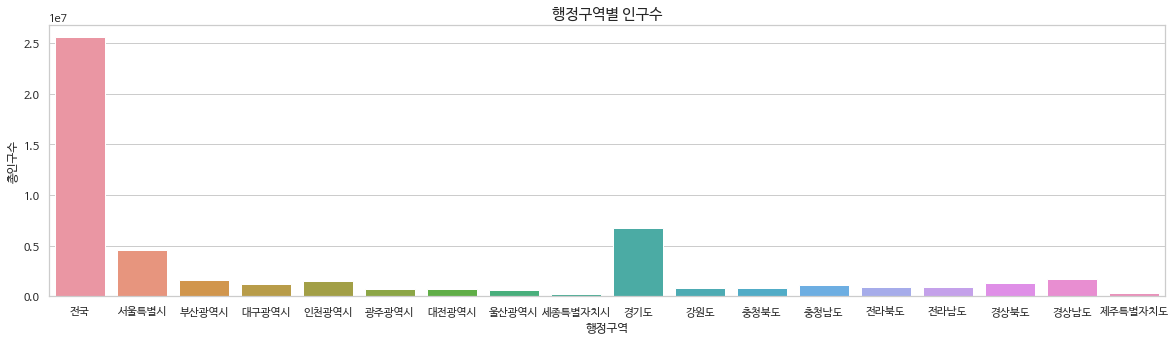

In [76]:
# 행정구역별, 총인구수를 따로 분리한 테이블 사용하여 시각화하였습니다.

plt.figure(figsize=(20,5)) # 그래프사이즈
plt.title("행정구역별 인구수", fontsize = 15)
sns.barplot(data=p_df_sum, x="행정구역", y="총인구수", errwidth=0)
plt.show()

- 예상대로 경기도와 서울특별시가 가장 높다는 것을 알 수 있다.
- 세종특별자치시의 인구수가 가장 적다는 것을 알 수 있다.

In [77]:
p_df_1['연령구간'].unique()

array(['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대',
       '90대', '100대 이상'], dtype=object)

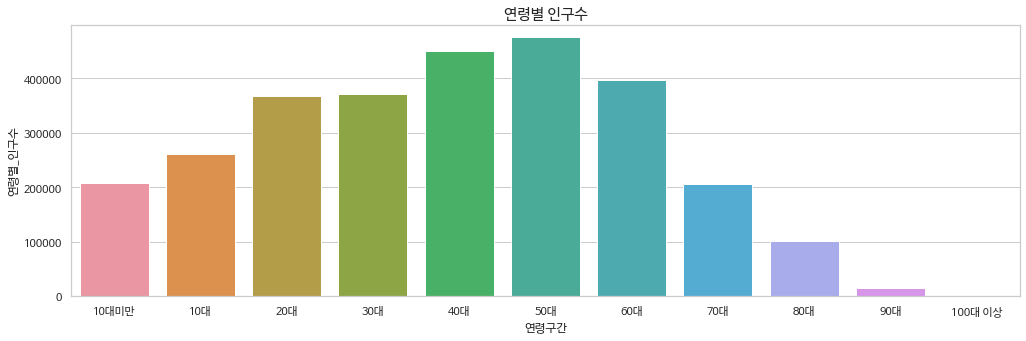

In [78]:
plt.figure(figsize=(17,5))
plt.title("연령별 인구수", fontsize = 15)
sns.barplot(data=p_df_1, x="연령구간", y="연령별_인구수",ci=None)
plt.show()

# 50대, 40대, 60대가 가장 많았다.

- 50대, 40대, 60대가 가장 많다는 것을 알 수 있다. 
- 10대미만, 10대의 인구수가 50대, 40대보다 적다는 것을 알 수 있다.
- 20대, 30대가 비슷하게 분포해 있다는 것을 알 수 있다.

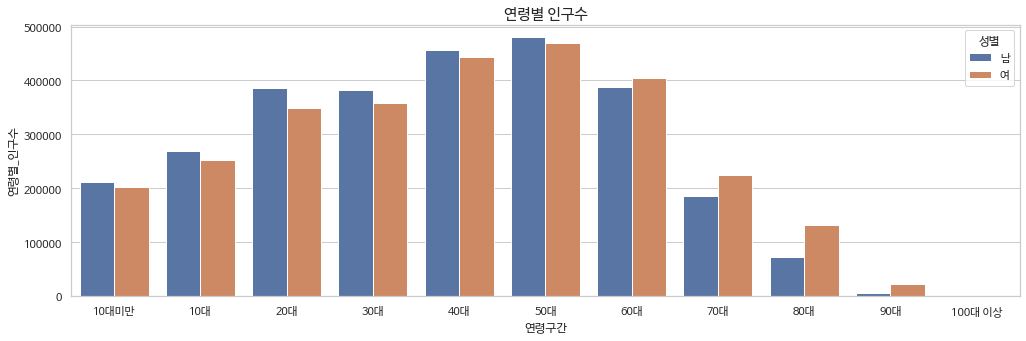

In [79]:
plt.figure(figsize=(17,5))
plt.title("연령별 인구수", fontsize = 15)
sns.barplot(data=p_df_1, x="연령구간", y="연령별_인구수",hue="성별",ci=None)
plt.show()

- 10대미만 ~ 50대는 남성이 여성보다 많지만 60대부터는 여성이 더 많다는 것을 알 수 있다.
- 남녀의 인구수가 비슷하다는 것을 알 수 있다.(크게 차이가 나지 않는다.)

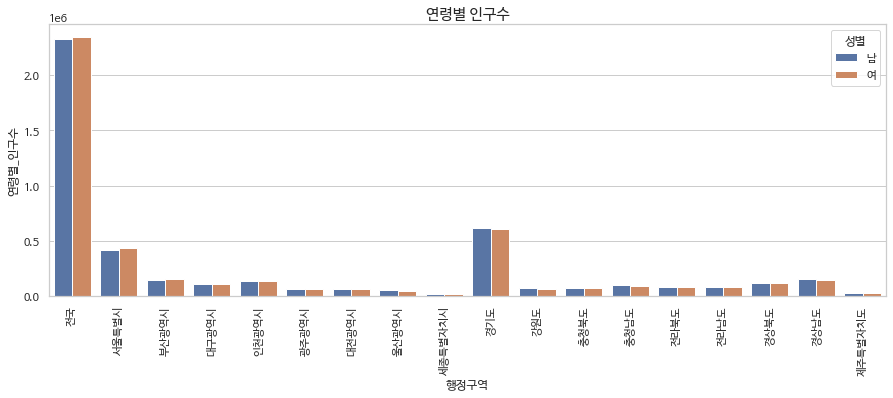

In [93]:
plt.figure(figsize=(15,5))
plt.title("연령별 인구수", fontsize = 15)
plt.xticks(rotation=90)
sns.barplot(data=p_df_1, x="행정구역", y="연령별_인구수",hue="성별",ci=None)
plt.show()

# 남녀의 인구수가 대략 비슷한 것으로 알 수 있다. (큰 차이가 없다.)

### 지역별 비교하기 (top5)
##### 경기도, 서울특별시, 경상남도, 부산광역시, 인천광역시

In [81]:
p_df_g = p_df_1[p_df_1["행정구역"] == "경기도"] # 1위
p_df_s = p_df_1[p_df_1["행정구역"] == "서울특별시"] # 2위
p_df_gn = p_df_1[p_df_1["행정구역"] == "경상남도"] #3위
p_df_b = p_df_1[p_df_1["행정구역"] == "부산광역시"] # 4위
p_df_in = p_df_1[p_df_1["행정구역"] == "인천광역시"] #5위

In [82]:
p_df_g.head()

,행정구역,성별,연령구간,연령별_인구수
9,경기도,남,10대미만,559399
27,경기도,남,10대,676575
45,경기도,남,20대,941610
63,경기도,남,30대,976612
81,경기도,남,40대,1159290


##### 경기도 연령별 인구수
- 경기도에 40대, 50대의 인구수가 많다는 것을 알 수 있다.
- 20대의 경우 남성의 인구수가 더 높게 나타났다.
- 가장 높은 인구수 top5는  40대 남성 -> 50대 남성 -> 40대 여성 -> 50대 여성 -> 30대 남성으로 나타났다.

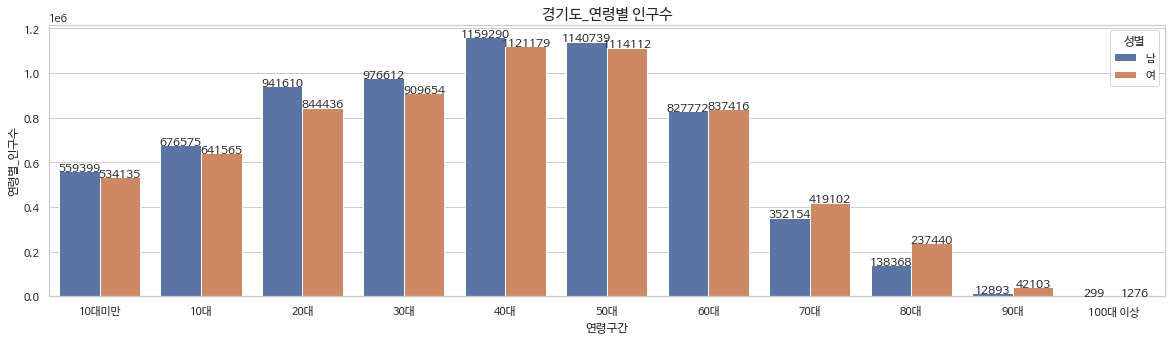

In [109]:
# 경기도
fig, ax = plt.subplots( figsize=(20,5) )
ax.set_title("경기도_연령별 인구수", fontsize = 15)

sns.barplot(x = p_df_g["연령구간"], y = p_df_g["연령별_인구수"],hue=p_df_g["성별"])

# 정확히 보기 위해서 수치 표현
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치 구하기
            p.get_y() + p.get_height(),   # 세로 위치 구하기
            f"{p.get_height():.0f}",     # 값 + 소수점 출력 안함
            ha = 'center' )   # 가운데 정렬


#### 서울 연령별 인구수

- 20대, 30대, 40대, 50대의 인구수가 비슷하다는 것을 알 수 있다.
- 20대의 경우 여성의 인구수가 더 높게 나타났다.
- 가장 높은 인구수 top5는 50대 여성 -> 40대 여성 -> 20대 여성 -> 50대 남성 -> 40대 남성으로 나타났다.

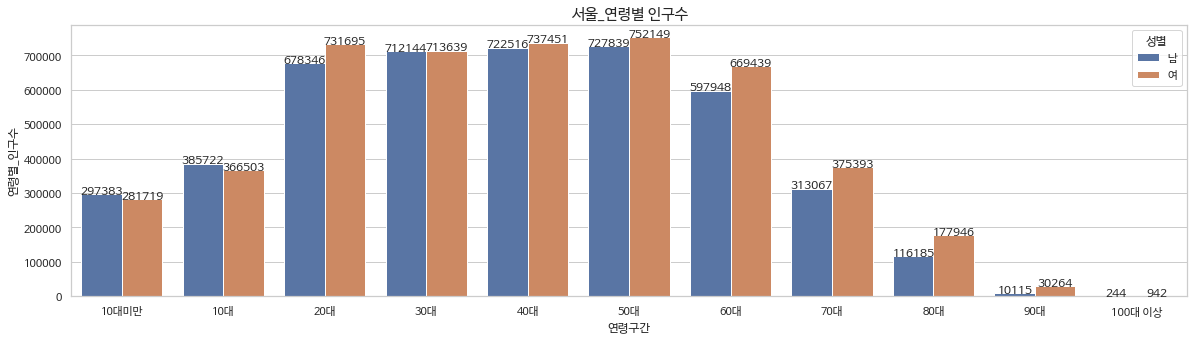

In [108]:
fig, ax = plt.subplots( figsize=(20,5) )
ax.set_title("서울_연령별 인구수", fontsize = 15)

sns.barplot(x = p_df_s["연령구간"], y = p_df_s["연령별_인구수"],hue=p_df_s["성별"])

# 정확히 보기 위해서 수치 표현
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치 구하기
            p.get_y() + p.get_height(),   # 세로 위치 구하기
            f"{p.get_height():.0f}",     # 값 + 소수점 출력 안함
            ha = 'center' )   # 가운데 정렬

#### 경상남도 연령별 인구수

- 40대, 50대의 인구수가 많다는 것을 알 수 있다.
- 가장 높은 인구수 top5는 50대 남성 -> 50대 여성 -> 40대 남성 -> 40대 여성 -> 60대 여성으로 나타났다.
- 20대의 경우 남성의 인구수가 더 높게 나타났다.

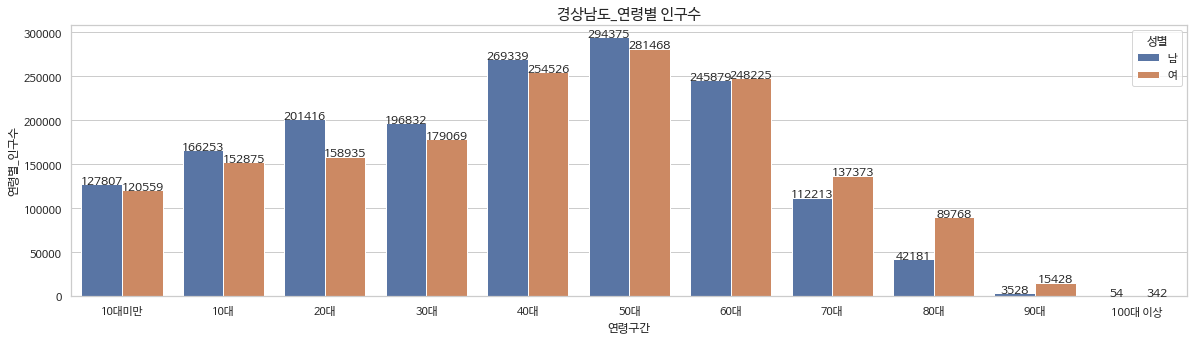

In [110]:
# 경상남도
fig, ax = plt.subplots( figsize=(20,5) )
ax.set_title("경상남도_연령별 인구수", fontsize = 15)

sns.barplot(x = p_df_gn["연령구간"], y = p_df_gn["연령별_인구수"],hue=p_df_gn["성별"])

# 정확히 보기 위해서 수치 표현
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치 구하기
            p.get_y() + p.get_height(),   # 세로 위치 구하기
            f"{p.get_height():.0f}",     # 값 + 소수점 출력 안함
            ha = 'center' )   # 가운데 정렬

#### 부산 연령별 인구수

- 40대,50대,60대의 인구수가 많다는 것을 알 수 있다.
- 가장 높은 인구수 top5는 60대 여성 -> 50대 여성 -> 50대 남성 -> 60대 남성 -> 40대 남성으로 나타났다.
- 20대의 경우 남성의 인구수가 더 높게 나타났다.

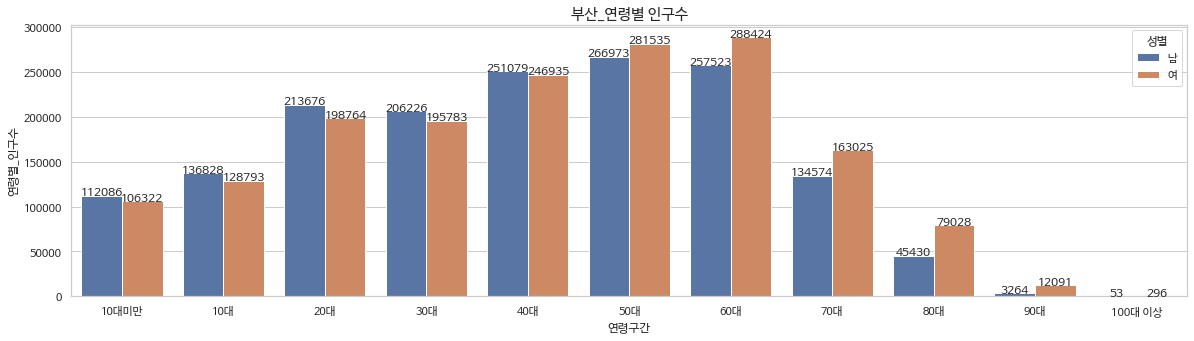

In [111]:
# 부산
fig, ax = plt.subplots( figsize=(20,5) )
ax.set_title("부산_연령별 인구수", fontsize = 15)

sns.barplot(x = p_df_b["연령구간"], y = p_df_b["연령별_인구수"],hue=p_df_b["성별"])

# 정확히 보기 위해서 수치 표현
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치 구하기
            p.get_y() + p.get_height(),   # 세로 위치 구하기
            f"{p.get_height():.0f}",     # 값 + 소수점 출력 안함
            ha = 'center' )   # 가운데 정렬

#### 인천 연령별 인구수

- 40대, 50대의 인구수가 많다는 것을 알 수 있다.
- 가장 높은 인구수 top5는 50대 여성 -> 50대 남성 -> 40대 남성 -> 40대 여성 -> 30대 남성으로 나타났다.
- 20대의 경우 남성의 인구수가 더 높게 나타났다.

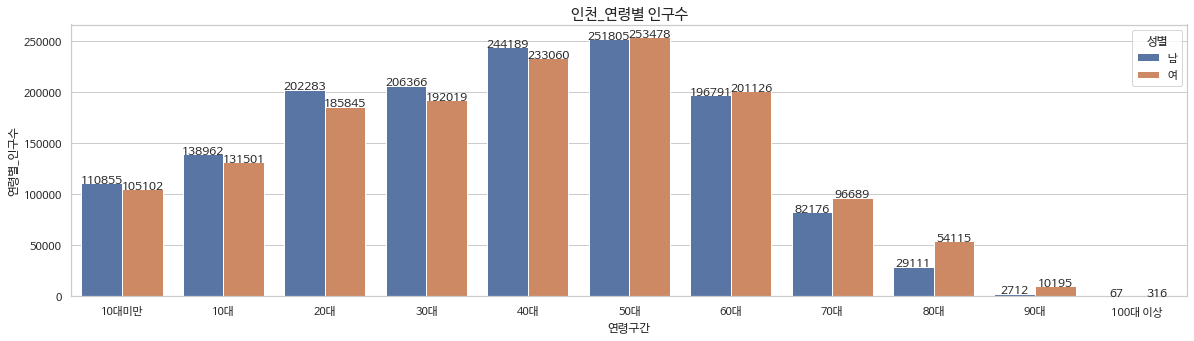

In [112]:
# 인천
fig, ax = plt.subplots( figsize=(20,5) )
ax.set_title("인천_연령별 인구수", fontsize = 15)

sns.barplot(x = p_df_in["연령구간"], y = p_df_in["연령별_인구수"],hue=p_df_in["성별"])

# 정확히 보기 위해서 수치 표현
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치 구하기
            p.get_y() + p.get_height(),   # 세로 위치 구하기
            f"{p.get_height():.0f}",     # 값 + 소수점 출력 안함
            ha = 'center' )   # 가운데 정렬

### 결론
- 가장 많은 나이대는 전체적으로 40대와 50대로 나타났습니다.
- 인구가 가장 많이 분포된 top5는 경기도, 서울특별시, 경상남도, 부산광역시, 인천광역시입니다.
- 대체적으로 남성의 인구수가 여성의 인구수보다 높으나 60대 이후로는 여성의 인구수가 더 높은 것을 알 수 있습니다.

### 처음에 했던 질문
> 서울에는 젊은 인구층의 분포가 더 높을까?
>> - 서울에는 20대, 30대, 40대, 50대가 가장 높게 나타났으며, 20대-50대 사이가 골고루 분포되어 있는것을 알 수 있습니다.
>> - 서울에서 가장 많은 연령대는 50대 여성 -> 40대 여성 -> 20대 여성 -> 50대 남성 -> 40대 남성 순서로 나타났습니다.
>> - 또한 20대의 경우는 남성보다 여성의 인구수가 더 높게 나타났습니다.

> 가장 많은 연령대는 어느 구간일까?
>> - 50대, 40대가 가장 많다는 것을 알 수 있다습니다.
>> - 20대, 30대가 비슷하게 분포해 있다는 것을 알 수 있습니다.
